In [1]:
import pandas as pd

donwload the dataset and put under `data`

## Load user responses

In [8]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [9]:
len(data)

1382727

In [13]:
# calc percent of correct for each question
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())

0 2812 0.44345661450924606 0.009370109336123865
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190472
3 2672 0.8087574850299402 0.007609645680958997
4 1704 0.4014084507042254 0.011878216105764141
5 833 0.1908763505402161 0.013624539924512919
6 1718 0.5285215366705471 0.012046950521125577
7 89 0.34831460674157305 0.05078827950334113
8 2327 0.3919209282337774 0.010122188032315182
9 834 0.36330935251798563 0.016664029411268565
10 1572 0.4020356234096692 0.012370345562832924
11 2171 0.45831414094887146 0.010696101386212253
12 1701 0.3991769547325103 0.011877678361556359
13 1259 0.6965845909451946 0.012961803326362792
14 1697 0.6682380671773719 0.011433151502268899
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912677
17 848 0.42924528301886794 0.017007317337094298
18 2173 0.3175333640128854 0.009988619831022786
19 2692 0.6355869242199108 0.009277428244661849
20 1707 0.6338605741066198 0.011663545946428995
21 137 0.40875912408759124

874 579 0.41278065630397237 0.020478395489109
875 1671 0.3267504488330341 0.01147725146582774
876 79 0.379746835443038 0.05495209760281386
877 1581 0.5142314990512334 0.012573768768140068
878 1422 0.3066104078762307 0.012231650596925409
879 1590 0.24968553459119497 0.010858164135207229
880 1496 0.49331550802139035 0.012930359328050428
881 2686 0.8224125093075205 0.007375286475313083
882 2303 0.3421623968736431 0.0098883271766484
883 167 0.30538922155688625 0.035747326542025434
884 626 0.5878594249201278 0.01968880784416187
885 2577 0.5366705471478463 0.009824849479902796
886 73 0.3150684931506849 0.05474693519763383
887 2641 0.46611132146914047 0.009708859540963054
888 89 0.3707865168539326 0.05148961455006565
889 2365 0.6443974630021142 0.00984545066333665
890 2558 0.4812353401094605 0.009880947317052252
891 1629 0.4039287906691222 0.012161139693094108
892 80 0.4375 0.055813177292586294
893 80 0.425 0.055617932633097236
894 861 0.7421602787456446 0.014916761268508116
895 167 0.4191616

In [26]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<AxesSubplot:>

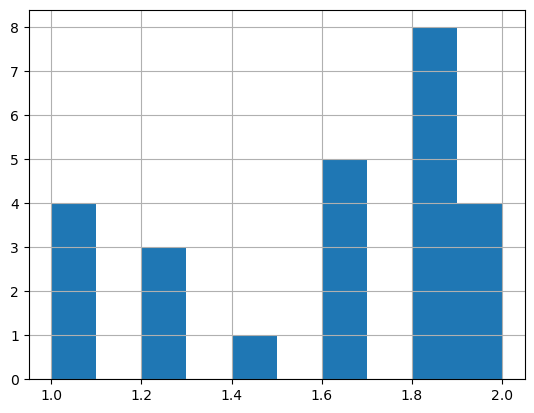

In [31]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<AxesSubplot:>

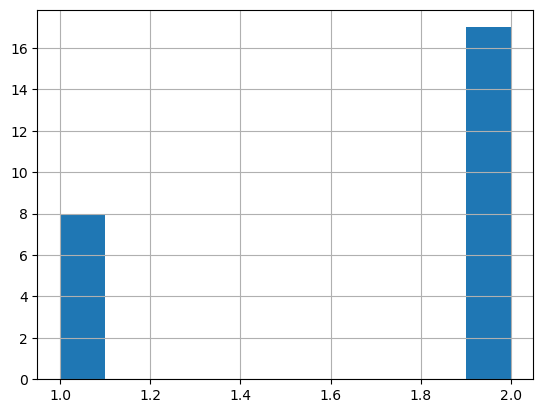

In [60]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [52]:
preference

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


<AxesSubplot:>

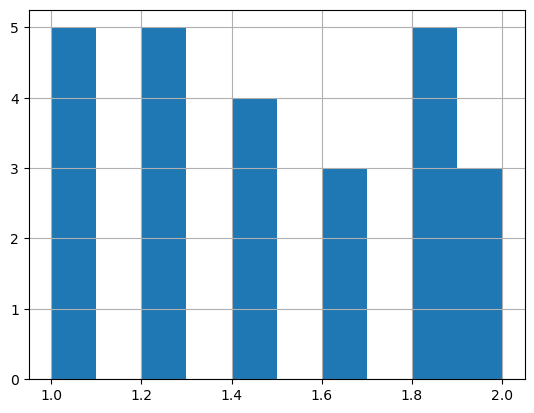

In [33]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

## Evaluate
code from https://competitions.codalab.org/forums/22145/4564/

In [8]:
template = pd.read_csv('submission/template.csv')
len(template)

948

In [9]:
template.head()

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [35]:
template['ranking'] = 1

In [39]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    
evaluate(eval_dev, template)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
